<a href="https://colab.research.google.com/github/hmorikawa19/how2use-opencv/blob/master/HowToUseOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# jupyternotebookでは必要
%matplotlib inline

# opencvのバージョン
cv2.__version__

'3.4.3'

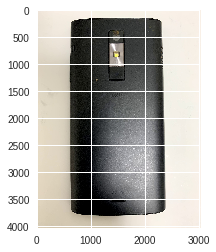

In [57]:
# -------------------------------------------------------------------
# まずは画像の読み込みと表示
# -------------------------------------------------------------------

img = cv2.imread('s.jpg')
# img = cv2.imread('3.png')
# opencvではBGRで読み込みされるため、matplotlibようにRGBに変換
# cv2.imshowならBGRで表示できる
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# opencvなら、cv2.imshowで表示できる
plt.imshow(im_rgb)
plt.show()

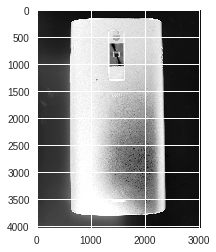

In [58]:
# -------------------------------------------------------------------
# 輪郭の取得
# -------------------------------------------------------------------
# 輪郭を取得するため、グレースケール化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

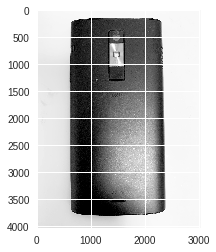

In [59]:
# 黒白反転→輪郭を取得するために背景を白くする。外側が黒だと輪郭を取得しないため
gray = cv2.bitwise_not(gray, gray)
plt.imshow(gray)

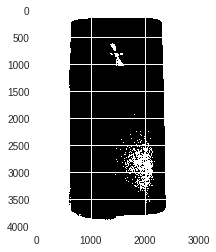

In [72]:
# 輪郭を取得しやすくするために二値化
ret,thresh = cv2.threshold(gray,80,255,0)
plt.imshow(thresh)

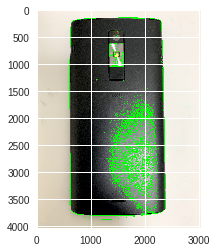

In [73]:
# 輪郭の頂点の数が最大のものを最大の輪郭として採用している
def index_emax(cnt):
    max_num = 0
    max_i = -1
    for i in range(len(cnt)):
        cnt_num=len(cnt[i])
        # print(cnt_num)
        if cnt_num > max_num:
            max_num = cnt_num
            max_i = i
    return max_i


# 輪郭の取得
img_c, cnt, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
n = index_emax(cnt)

if n != -1 and len(cnt) > 0:
    for i in range(len(cnt)):
        # 凸包の作成
        hull = cv2.convexHull(cnt[i])
        x,y,w,h = cv2.boundingRect(hull)
　      # 輪郭の描画
        cv2.drawContours(img, [hull], 0, (0,255,0), 2)

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
